# Vorbereitung der Daten für Korrelationen

In [28]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [77]:
# Aktuelle Pfade
file_paths = [
     "data/rad_2022_tage_19_06_23_r.csv",
#     "data/rad_2021_tage_19_06_23_r.csv",
#     "data/rad_2020_tage_19_06_23_r.csv",
#     "data/rad_2019_tage_19_06_23_r.csv",
#     "data/rad_2018_tage_19_06_23_r.csv",
#     "data/rad_2017_tage_19_06_23_r.csv",
#     "data/rad_2016_tage_19_06_23_r.csv",
#     "data/rad_2015_tage_19_06_23_r.csv",
#     "data/rad_2014_tage_19_06_23_r.csv",
#     "data/rad_2013_tage_19_06_23_r.csv",
#     "data/rad_2012_tage_19_06_23_r.csv",
#     "data/rad_2011_tage_19_06_23_r.csv",
#     "data/rad_2010_tage_19_06_23_r.csv",
#     "data/rad_2009_tage_19_06_23_r.csv",
#     "data/rad_2008_tage_19_06_23_r.csv"
]

In [45]:
# Aktuelle Pfade
file_paths = [
     "data/rad_2022_tage_19_06_23_r.csv",
     "data/rad_2021_tage_19_06_23_r.csv",
     "data/rad_2020_tage_19_06_23_r.csv",
     "data/rad_2019_tage_19_06_23_r.csv",
     "data/rad_2018_tage_19_06_23_r.csv",
     "data/rad_2017_tage_19_06_23_r.csv",
     "data/rad_2016_tage_19_06_23_r.csv",
     "data/rad_2015_tage_19_06_23_r.csv",
     "data/rad_2014_tage_19_06_23_r.csv",
     "data/rad_2013_tage_19_06_23_r.csv",
     "data/rad_2012_tage_19_06_23_r.csv",
#     "data/rad_2011_tage_19_06_23_r.csv",
#     "data/rad_2010_tage_19_06_23_r.csv",
#     "data/rad_2009_tage_19_06_23_r.csv",
#     "data/rad_2008_tage_19_06_23_r.csv"
]

In [78]:
df_list = []

for file_path in file_paths:
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)

# Einzelne DataFrames zu einem Gesamt-DataFrame zusammenführen
df = pd.concat(df_list, ignore_index=True)

In [79]:
df.describe()

,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
count,2112.000000,2112.000000,2112.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1255.560606,1016.145360,2271.705966,6.833973,16.265479,2.275068,68.553425,6.251507
std,976.989902,1008.058567,1925.919657,6.628966,8.924385,4.901089,29.227243,4.819721
min,6.000000,0.000000,9.000000,-10.200000,-5.600000,0.000000,0.000000,0.000000
25%,530.750000,237.500000,875.750000,1.200000,9.300000,0.000000,53.000000,1.500000
50%,995.000000,670.000000,1616.000000,7.000000,16.000000,0.000000,76.000000,6.000000
75%,1743.000000,1495.500000,3025.500000,12.500000,23.800000,2.300000,93.000000,10.700000
max,5690.000000,5193.000000,10883.000000,19.900000,36.800000,43.100000,100.000000,15.700000


In [80]:
df = df.drop(columns=['uhrzeit_ende'], errors='ignore')
df = df.drop(columns=['richtung_1'], errors='ignore')
df = df.drop(columns=['richtung_2'], errors='ignore')

In [81]:
df

,datum,zaehlstelle,uhrzeit_start,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden,kommentar
0,2022-01-01,Arnulf,00:00,444.0,3.2,13.4,0.0,68,7.6,NaN
1,2022-01-02,Arnulf,00:00,476.0,1.9,15.8,0.0,80,4.7,NaN
2,2022-01-03,Arnulf,00:00,752.0,8.7,11.5,0.7,99,0.0,NaN
3,2022-01-04,Arnulf,00:00,603.0,3.7,16.5,10.3,98,1.0,NaN
4,2022-01-05,Arnulf,00:00,578.0,0.3,3.9,1.2,95,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...
2185,2022-12-27,Olympia,00:00,684.0,1.2,7.0,0.0,64,5.6,NaN
2186,2022-12-28,Olympia,00:00,821.0,0.6,9.5,0.0,93,3.6,NaN
2187,2022-12-29,Olympia,00:00,880.0,5.1,13.5,1.2,98,3.4,NaN
2188,2022-12-30,Olympia,00:00,860.0,4.3,12.7,1.5,76,6.1,NaN


# ACHTUNG: Korrelation für 2022 nur für Zählstelle "Erhardt"

In [34]:
# DataFrame nur mit Einträgen, bei denen 'zaehlstelle' den Wert 'Erhardt' hat
df_erhardt = df.loc[df['zaehlstelle'] == 'Erhardt']

# Ausgabe des resultierenden DataFrames
print(df_erhardt)


          datum zaehlstelle uhrzeit_start  gesamt  min.temp  max.temp  \
365  2022-01-01     Erhardt         00:00  2186.0       3.2      13.4   
366  2022-01-02     Erhardt         00:00  2701.0       1.9      15.8   
367  2022-01-03     Erhardt         00:00  2547.0       8.7      11.5   
368  2022-01-04     Erhardt         00:00  2157.0       3.7      16.5   
369  2022-01-05     Erhardt         00:00  1948.0       0.3       3.9   
..          ...         ...           ...     ...       ...       ...   
725  2022-12-27     Erhardt         00:00  1507.0       1.2       7.0   
726  2022-12-28     Erhardt         00:00  1789.0       0.6       9.5   
727  2022-12-29     Erhardt         00:00  2093.0       5.1      13.5   
728  2022-12-30     Erhardt         00:00  2111.0       4.3      12.7   
729  2022-12-31     Erhardt         00:00  1868.0      10.5      20.0   

     niederschlag  bewoelkung  sonnenstunden kommentar  
365           0.0          68            7.6       NaN  
366      

In [35]:
# Wähle nur numerische Spalten aus
numeric_columns = df_erhardt.select_dtypes(include='number')

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Wende den StandardScaler auf die ausgewählten numerischen Spalten an
scaled_data = scaler.fit_transform(numeric_columns)

# Erstelle ein neues DataFrame mit skalierten Werten
df_scaled = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Berechne die Korrelationsmatrix für die skalierten Daten
correlation_matrix_scaled = df_scaled.corr()

# Korrelationsmatrix anzeigen
correlation_matrix_scaled

,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
gesamt,1.000000,0.615866,0.784205,-0.166469,-0.458316,0.724543
min.temp,0.615866,1.000000,0.899100,0.211516,-0.045006,0.310297
max.temp,0.784205,0.899100,1.000000,0.096231,-0.324942,0.613784
niederschlag,-0.166469,0.211516,0.096231,1.000000,0.254980,-0.240034
bewoelkung,-0.458316,-0.045006,-0.324942,0.254980,1.000000,-0.793516
sonnenstunden,0.724543,0.310297,0.613784,-0.240034,-0.793516,1.000000


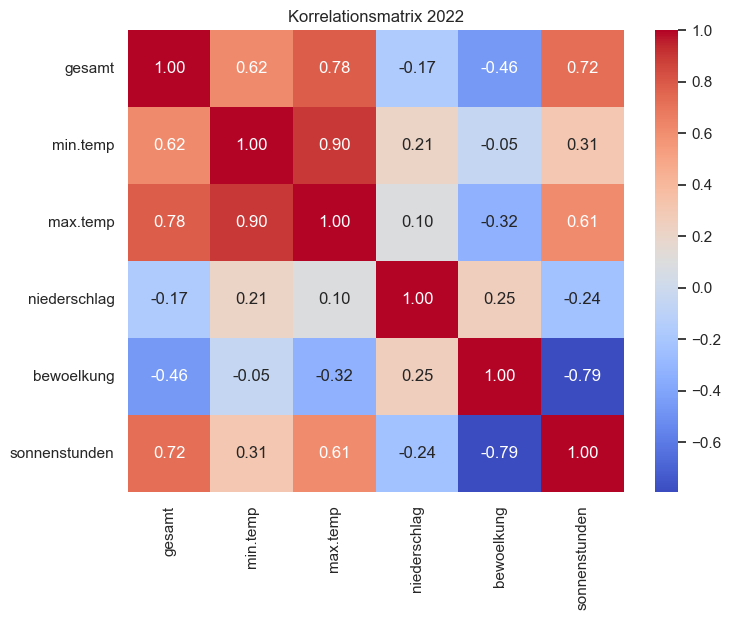

In [36]:
# Plot der Korrelationsmatrix mit Seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_scaled, annot=True, cmap="coolwarm", fmt=".2f")

# Hinzufügen des Titels
plt.title("Korrelationsmatrix 2022")

# Diagramm anzeigen
plt.show()

<Axes: xlabel='max.temp', ylabel='gesamt'>

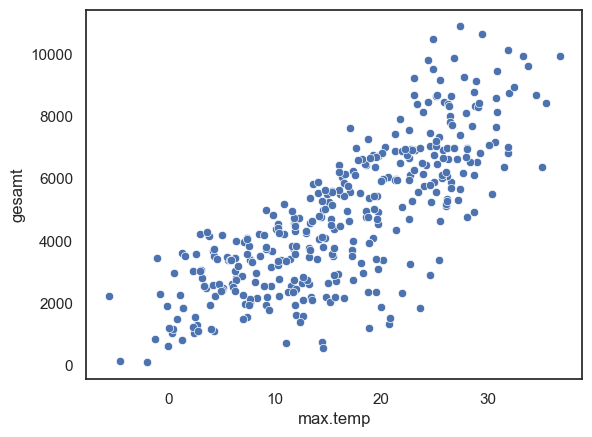

In [38]:
sns.scatterplot(data=df_erhardt, x="max.temp", y="gesamt")

# Hier auch für alle Zähstellen

# Nur 365 Rows: nach 'datum' gruppiert

In [82]:
# Gruppiere den DataFrame nach 'datum' und summiere die Werte in den relevanten Spalten
df_summed = df.groupby('datum').agg({
    'gesamt': 'sum',
    'min.temp': 'mean',        # Durchschnitt der min.temp pro Tag
    'max.temp': 'mean',        # Durchschnitt der max.temp pro Tag
    'niederschlag': 'mean',
    'bewoelkung': 'mean',      # Durchschnitt der bewoelkung pro Tag
    'sonnenstunden': 'mean',
    'kommentar': 'first'       # Falls es Kommentare gibt, wird der erste genommen
}).reset_index()

# Ausgabe des resultierenden DataFrames
print(df_summed)


          datum  gesamt  min.temp  max.temp  niederschlag  bewoelkung  \
0    2022-01-01  6016.0       3.2      13.4           0.0        68.0   
1    2022-01-02  7016.0       1.9      15.8           0.0        80.0   
2    2022-01-03  7864.0       8.7      11.5           0.7        99.0   
3    2022-01-04  6563.0       3.7      16.5          10.3        98.0   
4    2022-01-05  5818.0       0.3       3.9           1.2        95.0   
..          ...     ...       ...       ...           ...         ...   
360  2022-12-27  5126.0       1.2       7.0           0.0        64.0   
361  2022-12-28  5751.0       0.6       9.5           0.0        93.0   
362  2022-12-29  6493.0       5.1      13.5           1.2        98.0   
363  2022-12-30  6268.0       4.3      12.7           1.5        76.0   
364  2022-12-31  5786.0      10.5      20.0           0.0        96.0   

     sonnenstunden kommentar  
0              7.6      None  
1              4.7      None  
2              0.0      None  

In [83]:
# Wähle nur numerische Spalten aus
numeric_columns = df_summed.select_dtypes(include='number')

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Wende den StandardScaler auf die ausgewählten numerischen Spalten an
scaled_data = scaler.fit_transform(numeric_columns)

# Erstelle ein neues DataFrame mit skalierten Werten
df_scaled = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Berechne die Korrelationsmatrix für die skalierten Daten
correlation_matrix_scaled = df_scaled.corr()

# Korrelationsmatrix anzeigen
correlation_matrix_scaled

,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
gesamt,1.000000,0.516211,0.687073,-0.150474,-0.378808,0.634907
min.temp,0.516211,1.000000,0.899100,0.211516,-0.045006,0.310297
max.temp,0.687073,0.899100,1.000000,0.096231,-0.324942,0.613784
niederschlag,-0.150474,0.211516,0.096231,1.000000,0.254980,-0.240034
bewoelkung,-0.378808,-0.045006,-0.324942,0.254980,1.000000,-0.793516
sonnenstunden,0.634907,0.310297,0.613784,-0.240034,-0.793516,1.000000


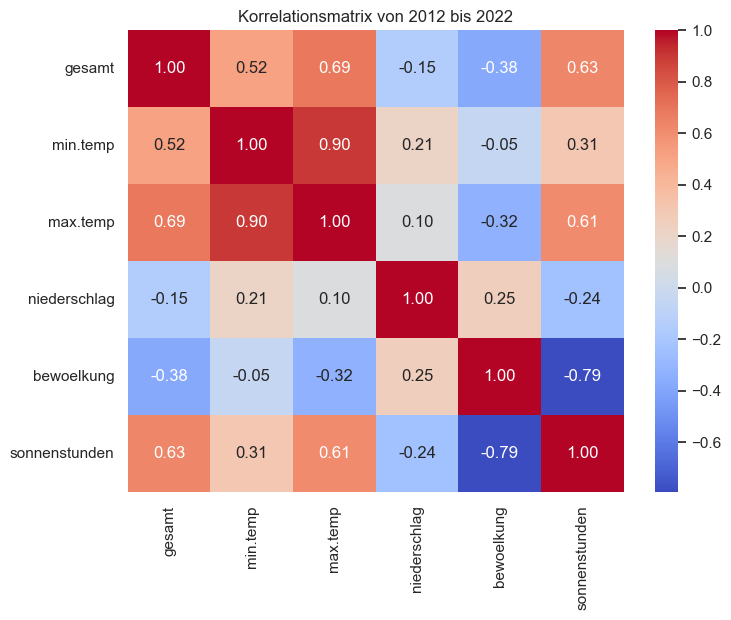

In [84]:
# Plot der Korrelationsmatrix mit Seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_scaled, annot=True, cmap="coolwarm", fmt=".2f")

# Hinzufügen des Titels
plt.title("Korrelationsmatrix von 2012 bis 2022")

# Diagramm anzeigen
plt.show()

<Axes: xlabel='max.temp', ylabel='gesamt'>

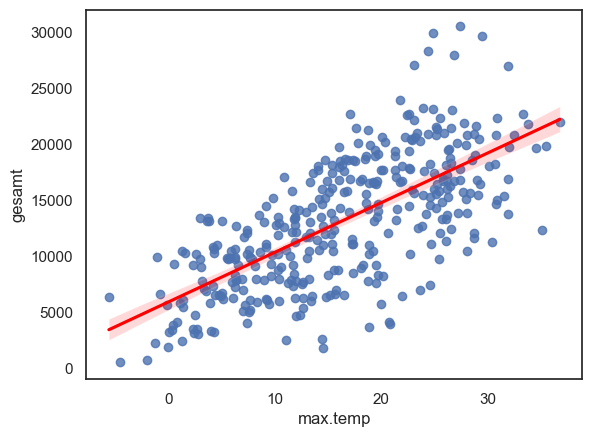

In [92]:
# sns.scatterplot(data=df_summed, x="max.temp", y="gesamt")

# sns.lmplot(data=df_summed, x="max.temp", y="gesamt", line_kws={'color': 'red'})
sns.regplot(data=df_summed, x="max.temp", y="gesamt", line_kws={'color': 'red'})



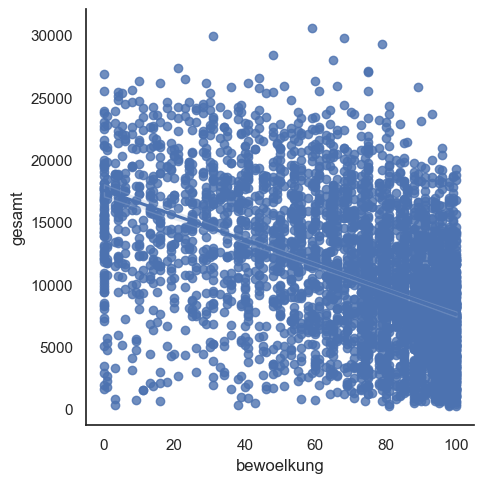

In [68]:
sns.lmplot(data=df_summed, x="bewoelkung", y="gesamt")

## Versuche: Korrelationsmatrix mit Altair statt Seaborn zu visualisieren

In [62]:
# Den DataFrame umbilden
correlation_matrix_scaled = correlation_matrix_scaled.stack().reset_index()
correlation_matrix_scaled.columns = ['variable_1', 'variable_2', 'correlation']

# Altair diagramm
alt.Chart(correlation_matrix_scaled).mark_rect().encode(
    alt.X('variable_1:N', title=''),
    alt.Y('variable_2:N', title=''),
    alt.Color('correlation:Q', legend=alt.Legend(title="Korrelation")),
    alt.Tooltip(['variable_1', 'variable_2', 'correlation'])
).properties(
    title="Korrelationsmatrix von 2012 bis 2022",
    width=600, # you can adjust the size as needed
    height=600 # you can adjust the size as needed
)

alt.Chart(...)

In [67]:
# Altair Diagramm
chart = alt.Chart(correlation_matrix_scaled).mark_rect().encode(
    x='variable_1:O',
    y='variable_2:O',
    color=alt.Color('correlation:Q', scale=alt.Scale(scheme='tableau10'), legend=alt.Legend(title="Korrelation")),
    tooltip=[
        alt.Tooltip('variable_1:O', title='Variable 1'),
        alt.Tooltip('variable_2:O', title='Variable 2'),
        alt.Tooltip('correlation:Q', title='Korrelation')
    ]
).properties(
    title="Korrelationsmatrix von 2012 bis 2022",
    width=600, # you can adjust the size as needed
    height=600 # you can adjust the size as needed
)

text = alt.Chart(correlation_matrix_scaled).mark_text(baseline='middle').encode(
    x='variable_1:O',
    y='variable_2:O',
    text=alt.Text('correlation:Q', format='.2f'),
    color=alt.condition(
        "datum.correlation > 0.0",
        alt.ColorValue(None),
        alt.ColorValue('black')
    )
)

chart + text

alt.LayerChart(...)